Name:Shahin Alam

ID: 1810176115

Import library files

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import R2Score

Generating training samples (-20 to +20)

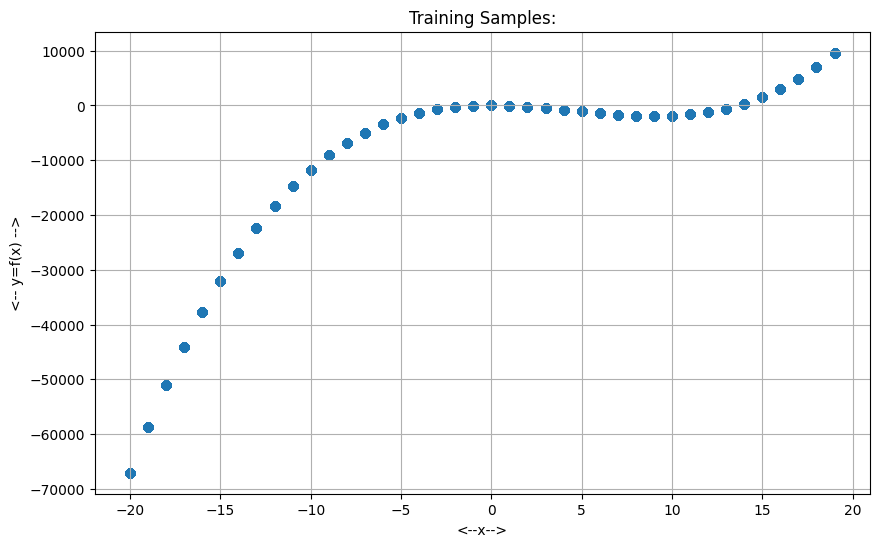

In [ ]:
samples = 7000
x = np.random.randint(-20, 20, samples, dtype=int)
y = 5 * (x**3) - 68 * (x**2) - 7 * x + 1

plt.figure(figsize=(10, 6))
plt.title('Training Samples:')
plt.scatter(x, y)
plt.xlabel('<--x-->')
plt.ylabel('<-- y=f(x) -->')
plt.grid()

plt.show()

Normalize the Training data at [-1, 1] range

In [ ]:
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x)) * 2 - 1
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y)) * 2 - 1

print(len(x_normalized), len(y_normalized))

7000 7000


Spliting data into training, validation, and test sets

In [ ]:
x_train = x_normalized[ : int(len(x_normalized) * 0.8)]
y_train = y_normalized[: int(len(y_normalized) * 0.8)]

x_validate = x_normalized[int(len(x_normalized) * 0.8) : int(len(x_normalized) * 0.90)]
y_validate = y_normalized[int(len(y_normalized) * 0.8) : int(len(y_normalized) * 0.90)]

x_test = x_normalized[int(len(x_normalized) * 0.90) : ]
y_test = y_normalized[int(len(y_normalized) * 0.90) : ]

print(len(x_test), len(y_test))

700 700


Building DNN model

In [ ]:
inputs = Input(shape=(1), name = 'Input_Layer')

h_layer = Dense(units = 32, activation = 'relu', name = 'hid_lr_1')(inputs)
h_layer = Dense(units = 64, activation = 'relu', name = 'hid_lr_2')(h_layer)
h_layer = Dense(units = 128, activation = 'relu', name = 'hid_lr_3')(h_layer)

outputs = Dense(units = 1, name = 'Output_Layer')(h_layer)
model = Model(inputs, outputs, name = 'DNN_Model')
model.summary()

Model: "DNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 1)]               0         
                                                                 
 hid_lr_1 (Dense)            (None, 32)                64        
                                                                 
 hid_lr_2 (Dense)            (None, 64)                2112      
                                                                 
 hid_lr_3 (Dense)            (None, 128)               8320      
                                                                 
 Output_Layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model

In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='mean_squared_error',
    metrics=R2Score()
)

Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs = 5, validation_data = (x_validate, y_validate))

Epoch 1/5
175/175 [==============================] - 1s 4ms/step - loss: 0.3074 - r2_score: -0.3671 - val_loss: 0.1239 - val_r2_score: 0.4461
Epoch 2/5
175/175 [==============================] - 0s 2ms/step - loss: 0.0641 - r2_score: 0.7150 - val_loss: 0.0261 - val_r2_score: 0.8833
Epoch 3/5
175/175 [==============================] - 0s 2ms/step - loss: 0.0139 - r2_score: 0.9383 - val_loss: 0.0063 - val_r2_score: 0.9720
Epoch 4/5
175/175 [==============================] - 0s 2ms/step - loss: 0.0050 - r2_score: 0.9778 - val_loss: 0.0034 - val_r2_score: 0.9847
Epoch 5/5
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - r2_score: 0.9871 - val_loss: 0.0022 - val_r2_score: 0.9903


Predicted Results on Test Data

In [ ]:
y_pred = model.predict(x_test)

22/22 [==============================] - 0s 1ms/step


Denormalizing the testing and predicting data

In [ ]:
x_test = ((x_test + 1) * (np.max(x) - np.min(x)) / 2) + np.min(x)
y_test = ((y_test + 1) * (np.max(y) - np.min(y)) / 2) + np.min(y)
y_pred = ((y_pred + 1) * (np.max(y) - np.min(y)) / 2) + np.min(y)

Check the pediction data on test data

In [ ]:
print('Actual X Value: ', x_test[6])
print('Actual Y Value: ', y_test[6])
print('Predicted Y Value: ', y_pred[6])

Actual X Value:  -14.0
Actual Y Value:  -26949.0
Predicted Y Value:  [-29629.17925715]


Display training curves

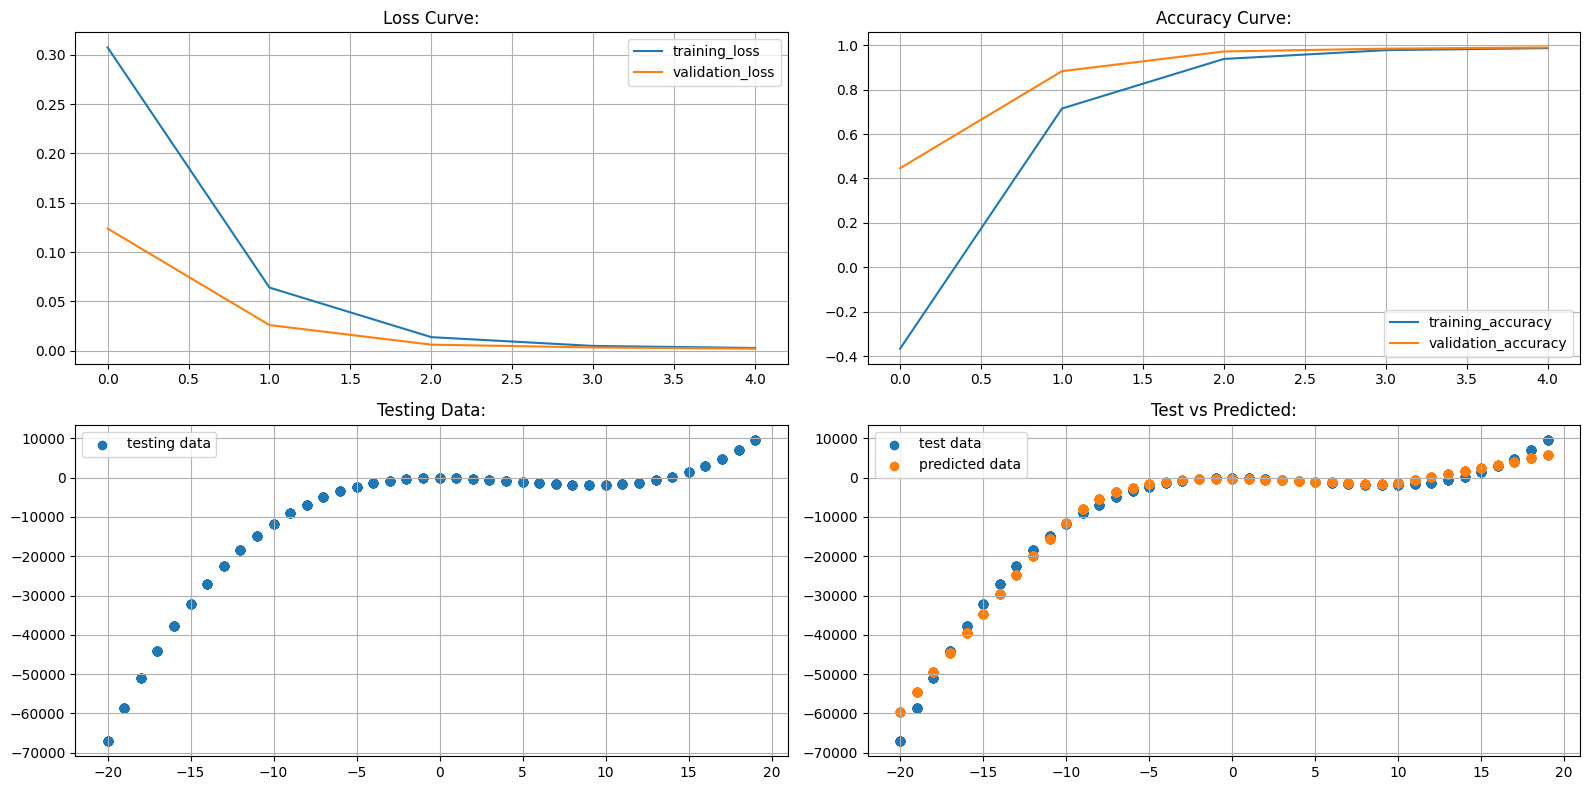

In [ ]:
performance_dict = history.history
plt.figure(figsize = (16, 8))

plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['training_loss', 'validation_loss'])
plt.title('Loss Curve:')
plt.grid()

plt.subplot(2,2,2)
plt.plot(performance_dict['r2_score'])
plt.plot(performance_dict['val_r2_score'])
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.title('Accuracy Curve:')
plt.grid()

plt.subplot(2,2,3)
plt.scatter(x_test, y_test)
plt.legend(['testing data'])
plt.title('Testing Data:')
plt.grid()

plt.subplot(2,2,4)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.legend(['test data', 'predicted data'])
plt.title('Test vs Predicted:')
plt.grid()

plt.tight_layout()
plt.show()

Evaluation based on test data

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

22/22 [==============================] - 0s 2ms/step - loss: 448334592.0000 - r2_score: -0.3129
Test Loss: 448334592.0
Test Accuracy: -0.31289196014404297
